# Website dataset

In [7]:
import pandas as pd
df = pd.read_csv('classification.tsv', sep='\t', error_bad_lines=False)# data.columns = ["a", "b", "c"]
df.head()

,Category,Title,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Arts & Humanities,68 Dean Street,NaN,NaN,NaN,NaN
1,Arts & Humanities,Abandoned Communities,NaN,NaN,NaN,NaN
2,Arts & Humanities,Alexander Thomson Society,NaN,NaN,NaN,NaN
3,Arts & Humanities,"Arab British Centre, The",NaN,NaN,NaN,NaN
4,Arts & Humanities,Architectural Association School of Architecture,NaN,NaN,NaN,NaN


In [8]:
df.shape

(9094, 6)

In [9]:
df = df[['Category', 'Title']]

In [10]:
df.head()

,Category,Title
0,Arts & Humanities,68 Dean Street
1,Arts & Humanities,Abandoned Communities
2,Arts & Humanities,Alexander Thomson Society
3,Arts & Humanities,"Arab British Centre, The"
4,Arts & Humanities,Architectural Association School of Architecture


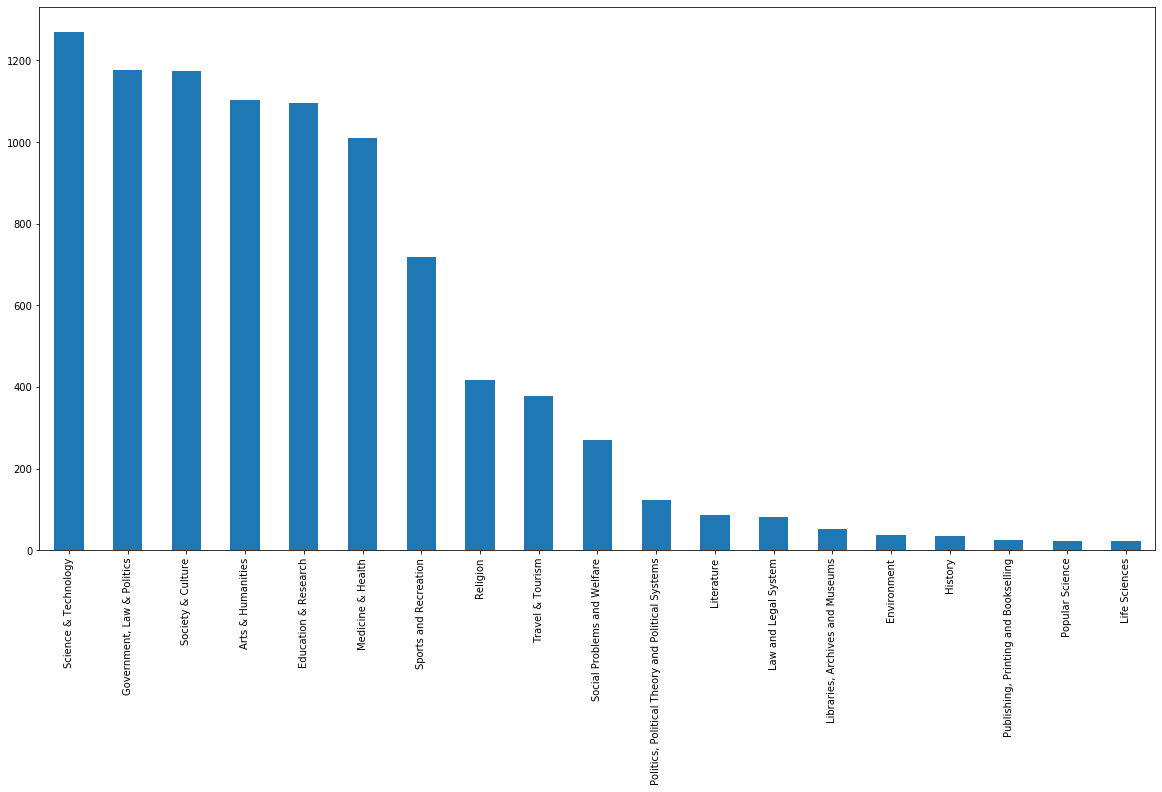

In [11]:
df.Category.value_counts().plot.bar(figsize = (20,10))

In [12]:
print(df['Category'].value_counts())

Science & Technology                                1268
Government, Law & Politics                          1176
Society & Culture                                   1173
Arts & Humanities                                   1102
Education & Research                                1096
Medicine & Health                                   1009
Sports and Recreation                                718
Religion                                             417
Travel & Tourism                                     378
Social Problems and Welfare                          270
Politics, Political Theory and Political Systems     123
Literature                                            87
Law and Legal System                                  81
Libraries, Archives and Museums                       52
Environment                                           38
History                                               34
Publishing, Printing and Bookselling                  26
Popular Science                

In [13]:
df.isna().sum()

Category    0
Title       0
dtype: int64

In [14]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Category,Title
0,Society & Culture,"Parish Church of St John the Evangelist, Couls..."
1,Education & Research,Sound Data Management Training (SoDaMaT)
2,Science & Technology,International Zoo News
3,Life Sciences,Complete works of Charles Darwin online
4,"Politics, Political Theory and Political Systems",Highlands and Islands Scottish Christian Party


In [15]:
from sklearn.model_selection import train_test_split
X = df.Title
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)
print(X_train)
X_train.shape

7678                                    Laura Robson Fans
4019         Christianity Uncut: Calling for real jubilee
3772                                    Haikugirl's Japan
7465    Institution of Commercial & Business Agents (I...
8220                                      October Gallery
                              ...                        
5734                        Nic Oatridge - A cancer diary
5191                 Testing IMS in Real Contexts (TIRCs)
5390                       Institute of Credit Management
860                                    Mid-Thames Quakers
7270                        Cambridge Capital Group (CCG)
Name: Title, Length: 7275, dtype: object


(7275,)

In [16]:
# Naive bayes vs Multinomial naive bayes
# For n dimensional data with k classes, in naive bayes, we have to assume some probability distribution for every
# dimension,class pair ; but in mnb we simply assume multinomial distribution for all the pairs.
from sklearn.naive_bayes import MultinomialNB

# Pipelining - Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit 
# and transform methods and the final estimator only needs to implement fit.
# making vectorizer => transformer => classifier 
from sklearn.pipeline import Pipeline

# tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended 
# to reflect how important a word is to a document in a collection or corpus
# TF - Term frequency(t,a) = no of occurrences of t in abstract(a) / no of words in abstract(a)
# IDF - inverse document frequency = log(no of documents/no of documents containing word t)
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
my_tags = ['Business, Economy & Industry' 'Education & Research' 'Literature'
 'Science & Technology' 'Arts & Humanities'
 'Crime, Criminology, Police and Prisons' 'Law and Legal System'
 'Company Web Sites' 'Medicine & Health' 'Religion' 'Society & Culture'
 'Social Problems and Welfare' 'Government, Law & Politics'
 'Digital Society'
 'Computer Science, Information Technology and Web Technology'
 'Environment' 'Travel & Tourism' 'Sports and Recreation'
 'Popular Science' 'Life Sciences' 'Libraries, Archives and Museums'
 'Politics, Political Theory and Political Systems'
 'Publishing, Printing and Bookselling' 'History']

mnb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
mnb.fit(X_train, y_train)
print(X_train)

# Import pickle Package
import pickle
# Save the Modle to file in the current working directory
Pkl_Filename = "Pickle_MNB_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(mnb, file)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(type(X_test), X_test)
y_pred = mnb.predict(X_test)
print(type(y_pred))

print('accuracy %s' % accuracy_score(y_pred, y_test))


print(confusion_matrix(y_pred, y_test))
# print(classification_report(y_test, y_pred,target_names=my_tags))

7678                                    Laura Robson Fans
4019         Christianity Uncut: Calling for real jubilee
3772                                    Haikugirl's Japan
7465    Institution of Commercial & Business Agents (I...
8220                                      October Gallery
                              ...                        
5734                        Nic Oatridge - A cancer diary
5191                 Testing IMS in Real Contexts (TIRCs)
5390                       Institute of Credit Management
860                                    Mid-Thames Quakers
7270                        Cambridge Capital Group (CCG)
Name: Title, Length: 7275, dtype: object
<class 'pandas.core.series.Series'> 5558                                        BioBridge Ltd
8350                                        Synthetix Ltd
2303                                        Pet Portraits
927                                                Contak
1963    BBC News: Wales - Violence fears over Credit 